In [1]:

from src.env import SampleContext, GetRealReward
import numpy as np


In [2]:
T = 5000 # Total number of periods
d = 4 # the dimension of context
K = 4
A = np.random.normal(loc=0, scale=1, size=(d, d))

context_list = SampleContext(d, K)
realized_reward = GetRealReward(context_list, A)

In [109]:
from src.env import SampleContext, GetRealReward
import numpy as np
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
type(device)
import numpy as np
import random
from copy import deepcopy
np.random.seed(12345)
K = 10
T = 6000 
d = 10

L = 2
m = 30 
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01
nu = 0.1 
lambda_ = 1
delta = 0.01 
S = 0.01 
eta = 1e-3 
frequency = 100
batchsize = 100
verbose = False


from src.neuralucb import NeuralAgent
neuralagent = NeuralAgent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)

import pandas as pd
from datetime import datetime
dates_ = pd.date_range(start = datetime.today(), periods = 100000, freq='S').to_pydatetime().tolist()
dates_ = pd.to_datetime(dates_)


cpu
Using device cpu


In [110]:
from tqdm import tqdm
import altair as alt
def plot_animation(df):
    lines = alt.Chart(df).mark_line().encode(
       x=alt.X('date:T', axis=alt.Axis(title='date')),
       y=alt.Y('rank:Q',axis=alt.Axis(title='rank')),
       color = 'color'
     ).properties(
       width=600,
       height=300
     ) 
    return lines


action_list = []
best_action = []
action_rank = []

for tt in tqdm(range(1, T + 1)):

    if tt %2000 == 1:
        A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neural_ind = neuralagent.Action(context_list)
    action_list.append(neural_ind)
    action_rank.append(list(action_order).index(neural_ind))




    ''' Online Learning '''
    neural_reward = realized_reward[neural_ind]
    neuralagent.Update(neural_reward)
  




100%|██████████| 6000/6000 [01:42<00:00, 58.48it/s] 


In [114]:
Noise1 = np.random.normal(loc=0, scale=1, size=(d, d))

In [115]:
Noise1

array([[ 1.03513724,  0.89986631, -0.99165589,  0.17304611, -0.44521485,
        -0.48241121, -0.3065082 , -1.33974646, -0.05159259,  1.39330634],
       [-1.43410411,  1.34088242,  1.65815082, -0.96566497,  0.54959456,
        -0.2225205 ,  0.43828197, -2.26389725, -0.64746076, -0.65861741],
       [-0.34723455,  0.44053496,  0.56271894, -1.81638238, -0.74145958,
        -0.19013955,  0.2237593 , -1.15043409, -0.49142117, -0.20787133],
       [-1.5595861 , -0.01064697,  0.25904144,  0.20237692,  0.44901926,
         0.29458354,  0.53077817, -0.61170283,  0.6180329 , -0.08735059],
       [-0.17381736, -0.04487909, -0.11366522, -0.38599898, -0.75202456,
        -1.81884108,  1.69487849, -0.58194566,  0.59578742,  0.22014065],
       [ 2.20471425, -0.99708262, -0.75954544,  1.83097543, -0.65118077,
        -0.63963824,  1.0023038 , -0.71567689, -0.69198143,  0.81551945],
       [ 0.36421688,  0.02067178, -0.02044666, -0.03723369, -0.48671207,
         1.6103433 ,  0.24013615,  0.7640551 

In [120]:
Noise2 = Noise1 + np.random.normal(loc=0, scale=0.05, size=(d, d))

In [121]:
Noise2

array([[ 0.86758871,  0.85314891, -1.00136584,  0.2340702 , -0.64086168,
        -0.51429761, -0.25697877, -1.34529011, -0.07111135,  1.5415936 ],
       [-1.37047332,  1.31265131,  1.76304658, -0.78711976,  0.53603753,
        -0.30549822,  0.60537628, -2.29208927, -0.70733563, -0.74118615],
       [-0.24568046,  0.41210624,  0.72995008, -1.8595181 , -0.84922087,
        -0.19640299,  0.22552766, -1.09792321, -0.55217972, -0.22443269],
       [-1.52163436,  0.05050339,  0.38939445,  0.24407464,  0.51195661,
         0.27115324,  0.44429283, -0.47238388,  0.61336559, -0.20608949],
       [-0.03532666,  0.12248732, -0.08314806, -0.3383049 , -0.80639182,
        -1.71375139,  1.82235732, -0.71144565,  0.6143357 ,  0.14731229],
       [ 2.08187304, -1.26189925, -0.54800247,  1.79236191, -0.54824563,
        -0.62088432,  1.09353057, -0.51455963, -0.62027855,  0.71143229],
       [ 0.31887794,  0.0660777 , -0.06489317, -0.18506269, -0.47465225,
         1.54779179,  0.20507828,  0.58881816

In [119]:
Noise1

array([[ 1.03513724,  0.89986631, -0.99165589,  0.17304611, -0.44521485,
        -0.48241121, -0.3065082 , -1.33974646, -0.05159259,  1.39330634],
       [-1.43410411,  1.34088242,  1.65815082, -0.96566497,  0.54959456,
        -0.2225205 ,  0.43828197, -2.26389725, -0.64746076, -0.65861741],
       [-0.34723455,  0.44053496,  0.56271894, -1.81638238, -0.74145958,
        -0.19013955,  0.2237593 , -1.15043409, -0.49142117, -0.20787133],
       [-1.5595861 , -0.01064697,  0.25904144,  0.20237692,  0.44901926,
         0.29458354,  0.53077817, -0.61170283,  0.6180329 , -0.08735059],
       [-0.17381736, -0.04487909, -0.11366522, -0.38599898, -0.75202456,
        -1.81884108,  1.69487849, -0.58194566,  0.59578742,  0.22014065],
       [ 2.20471425, -0.99708262, -0.75954544,  1.83097543, -0.65118077,
        -0.63963824,  1.0023038 , -0.71567689, -0.69198143,  0.81551945],
       [ 0.36421688,  0.02067178, -0.02044666, -0.03723369, -0.48671207,
         1.6103433 ,  0.24013615,  0.7640551 

<Axes: xlabel='time'>

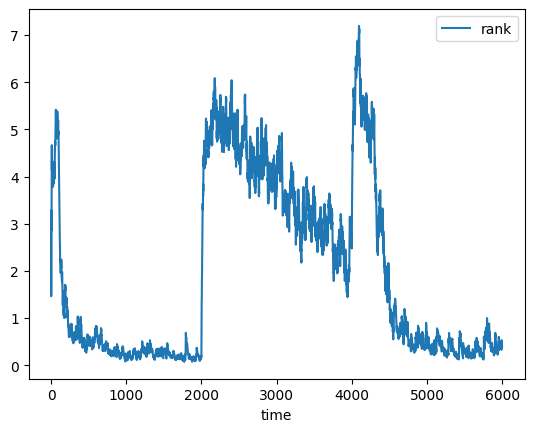

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(action_rank)
df['rank'] = action_rank
df['rank'] = df['rank'].ewm(com=20).mean()
df['time'] = np.arange(len(action_rank))
df.plot(x = 'time',y ='rank')

In [93]:
df_actions = pd.DataFrame()
df_actions['action_agent'] = action_list
df_actions['action_best'] = best_action[:len(action_list)]
from collections import Counter
100*Counter(df_actions[df_actions['action_agent'] == 1]['action_best'].values)[1]/len(df_actions[df_actions['action_agent'] == 1])


In [104]:
nba = {}
for i in range(K): 
    nba[i] = 100*Counter(df_actions[df_actions['action_agent'] == i]['action_best'].values)[i]/len(df_actions[df_actions['action_agent'] == i])
        

In [105]:
nba

{0: 60.0,
 1: 50.0,
 2: 71.42857142857143,
 3: 20.0,
 4: 50.0,
 5: 52.94117647058823,
 6: 27.272727272727273,
 7: 57.142857142857146,
 8: 14.814814814814815,
 9: 7.6923076923076925}

In [83]:
import pickle
with open('Reward_Matrix.pkl', 'rb') as f:
    A = pickle.load(f)

In [85]:
A.shape

(10, 10)

In [80]:
lines = plot_animation(df)
lines

alt.Chart(...)

In [67]:
pd.to_datetime(str(df['data'].values[0]).split('T')[0])

Timestamp('2023-03-19 00:00:00')

In [56]:
str(df['data'].values)[0]

'['

7.0455

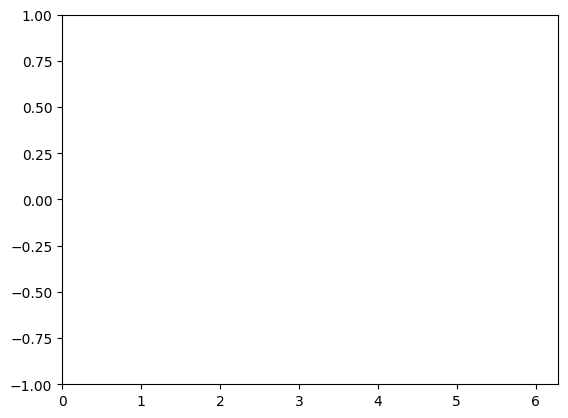

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

<Axes: xlabel='time'>

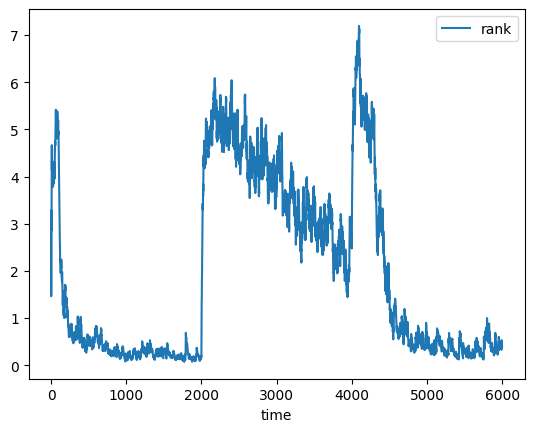

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(action_rank)
df['rank'] = action_rank
df['rank'] = df['rank'].ewm(com=20).mean()
df['time'] = np.arange(len(action_rank))
df.plot(x = 'time',y ='rank')

In [1]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

In [8]:
!pip install nbformat

In [ ]:
# arm = SampleContext(d = 4, K = 2)
# print(np.sum(arm[0:4, 0] * arm[0:4, 0]))
# print(np.sum(arm[0:4, 1] * arm[0:4, 1]))